<a href="https://colab.research.google.com/github/meharkhanniazi/Potato-Disease-Classification-Project/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
imageSize = 256
batchSize = 32
channelSize = 3
epochs = 30

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/PlantVillage",
    shuffle=True,
    image_size=(imageSize, imageSize),
    batch_size=batchSize
)

Found 2152 files belonging to 3 classes.


In [ ]:
classNames = dataset.class_names
classNames

['Early Blight', 'Healthy', 'Late Blight']

In [ ]:
for imageBatch, labelBatch in dataset.take(1):
    print(imageBatch.shape)
    print(labelBatch.numpy())

(32, 256, 256, 3)
[2 0 2 2 2 0 2 0 2 0 0 2 2 0 2 0 0 0 2 2 2 0 2 0 0 0 2 2 0 1 0 0]


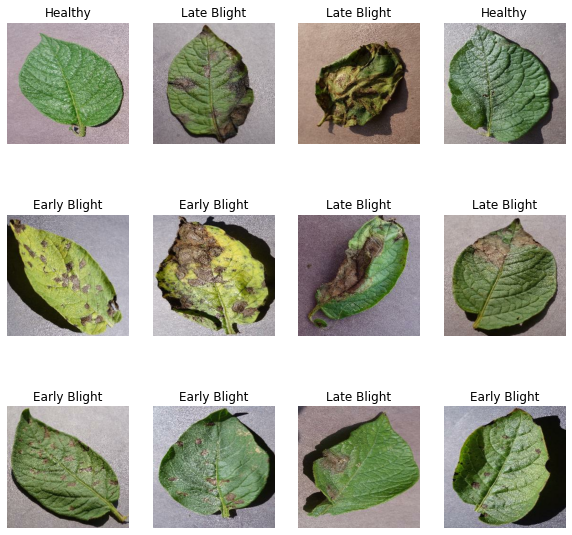

In [ ]:
plt.figure(figsize=(10,10))
for imageBatch, labelBatch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(imageBatch[i].numpy().astype("uint8"))
        plt.title(classNames[labelBatch[i]])
        plt.axis("off")
    

In [ ]:
trainingSize = 0.8
validationSize = 0.1
testSize = 0.1

In [ ]:
training_ds = dataset.take(int(len(dataset) * trainingSize))

In [ ]:
remaining_ds = dataset.skip(len(training_ds))

In [ ]:
validation_ds = remaining_ds.take(int(len(remaining_ds) * 0.5))

In [ ]:
test_ds = remaining_ds.skip(len(validation_ds))

In [ ]:
def getDatasetPartitions(ds, shuffle=True, shuffleSize=1000, trainingSize = 0.8, validationSize = 0.1, testSize = 0.1):
    if shuffle:
        ds = ds.shuffle(shuffleSize, seed=12)
    training_ds = ds.take(int(len(ds) * trainingSize))
    remaining_ds = ds.skip(len(training_ds))
    validation_ds = ds.take(int(len(ds) * validationSize))
    test_ds = remaining_ds.skip(len(validation_ds))
    return training_ds, validation_ds, test_ds

In [ ]:
training_ds, validation_ds, test_ds = getDatasetPartitions(dataset)

In [ ]:
len(training_ds)

54

In [ ]:
len(validation_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(imageSize, imageSize),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
no_of_classes = len(classNames)
inputShape = (batchSize, imageSize, imageSize, channelSize)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=inputShape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(no_of_classes, activation='softmax')
])

model.build(input_shape=inputShape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)         

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    training_ds,
    epochs = epochs,
    batch_size = batchSize,
    verbose = 1,
    validation_data = validation_ds
)

Epoch 1/30
54/54 [==============================] - 242s 155ms/step - loss: 0.9170 - accuracy: 0.5006 - val_loss: 0.8538 - val_accuracy: 0.6435
Epoch 2/30
54/54 [==============================] - 8s 150ms/step - loss: 0.7499 - accuracy: 0.6794 - val_loss: 0.5875 - val_accuracy: 0.7564
Epoch 3/30
54/54 [==============================] - 8s 149ms/step - loss: 0.5122 - accuracy: 0.7766 - val_loss: 0.4099 - val_accuracy: 0.8368
Epoch 4/30
54/54 [==============================] - 8s 148ms/step - loss: 0.3676 - accuracy: 0.8426 - val_loss: 0.3037 - val_accuracy: 0.8814
Epoch 5/30
54/54 [==============================] - 8s 149ms/step - loss: 0.2678 - accuracy: 0.8889 - val_loss: 0.4629 - val_accuracy: 0.8166
Epoch 6/30
54/54 [==============================] - 8s 149ms/step - loss: 0.2763 - accuracy: 0.8889 - val_loss: 0.1893 - val_accuracy: 0.9265
Epoch 7/30
54/54 [==============================] - 8s 149ms/step - loss: 0.1936 - accuracy: 0.9190 - val_loss: 0.1647 - val_accuracy: 0.9346
Epoc

In [ ]:
history

In [ ]:
history.params

{'epochs': 30, 'steps': 54, 'verbose': 1}

In [ ]:
model.evaluate(test_ds)

54/54 [==============================] - 2s 40ms/step - loss: 0.0696 - accuracy: 0.9751


[0.0696091428399086, 0.9751157164573669]

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.5005787014961243,
 0.6793981194496155,
 0.7766203880310059,
 0.8425925970077515,
 0.8888888955116272,
 0.8888888955116272,
 0.9189814925193787,
 0.9155092835426331,
 0.9346064925193787,
 0.9363425970077515,
 0.9363425970077515,
 0.9421296119689941,
 0.9496527910232544,
 0.9484953880310059,
 0.9716435074806213,
 0.9722222089767456,
 0.9427083134651184,
 0.9450231194496155,
 0.9722222089767456,
 0.9814814925193787,
 0.9386574029922485,
 0.9728009104728699,
 0.9762731194496155,
 0.9693287014961243,
 0.9820601940155029,
 0.9675925970077515,
 0.9756944179534912,
 0.9820601940155029,
 0.9652777910232544,
 0.9751157164573669]

First Image to Predict:
Actual Label:  Early Blight
Predicted Label:  Early Blight


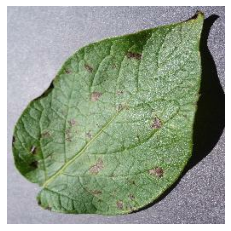

In [ ]:
import numpy as np
for imgBatch, lblBatch in test_ds.take(1):
  firstImg = imgBatch[0].numpy().astype('uint8')
  firstLbl = lblBatch[0]

  print('First Image to Predict:')
  plt.imshow(firstImg)
  plt.axis('off')
  print("Actual Label: ", classNames[firstLbl])
  batchPrediction = model.predict(imgBatch)
  print('Predicted Label: ',classNames[np.argmax(batchPrediction[0])])

In [ ]:
def predict(model, img):
  imgArray = tf.keras.preprocessing.image.img_to_array(imgs[i].numpy())
  imgArray = tf.expand_dims(imgArray, 0)
  predictions = model.predict(imgArray)
  predictedClass = classNames[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predictedClass, confidence

In [ ]:
plt.figure(figsize=(15,15))
for imgs, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(imgs[i].numpy().astype('uint8'))
    plt.axis('off')
    predictedClass, confidence = predict(model, imgs[i].numpy())
    actualClass = classNames[labels[i]]
    plt.title(f"Actual: {actualClass} \nPredicted: {predictedClass}\n Confidence %: {confidence}")

NameError: ignored

In [ ]:
import os
modelVersion = max([int(i) for i in os.listdir("/content/gdrive/MyDrive/Models")]) + 1

In [ ]:
model.save(f"/content/gdrive/MyDrive/Models/{modelVersion}")

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Models/2/assets
